# Limitaciones en la identificación por medio de la respuesta al impulso

Se tienen dos sistemas con respuesta al impulso muy parecida, pero respuestas al escalón muy diferentes en estado estacionario. Esto muestra que la respuesta al impulso no ofrece buena aproximación de los modelos en bajas frecuencias

In [14]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

TransferFunction(array([1.1777]), array([1.1216, 1.    ]))

TransferFunction(array([1.    , 0.2066]), array([1.        , 0.9808    , 0.19940487]))

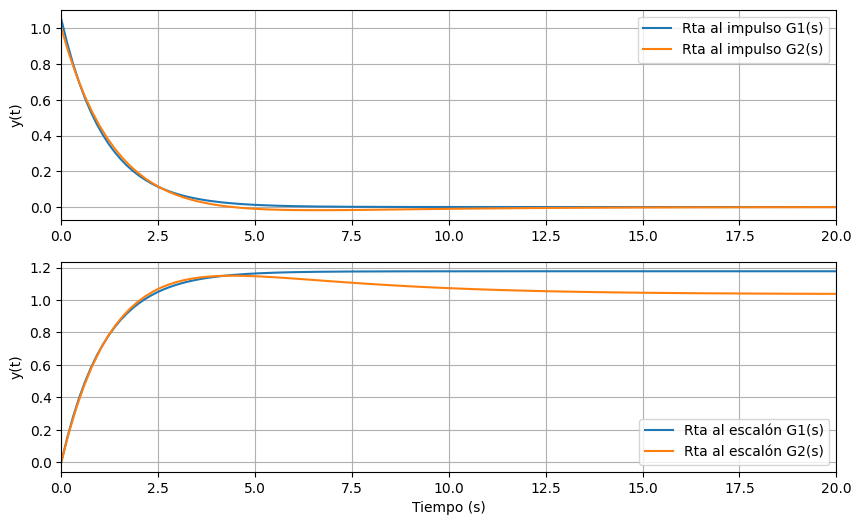

In [29]:
G1 = ctrl.tf([1.1777],[1.1216,1])
G2 = ctrl.tf([1,0.2066],np.polymul([1,0.6931],[1,0.2877]))

display(G1)
display(G2)

Tfin = 20
ti1,yi1 = ctrl.impulse_response(G1,Tfin)
ti2,yi2 = ctrl.impulse_response(G2,Tfin)

plt.figure(1,figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(ti1,yi1,label='Rta al impulso G1(s)')
plt.plot(ti2,yi2,label='Rta al impulso G2(s)')
#plt.xlabel('Tiempo (s)')
plt.xlim((0,Tfin))
plt.ylabel('y(t)')
plt.legend()
plt.grid()

ts1,ys1 = ctrl.step_response(G1,Tfin)
ts2,ys2 = ctrl.step_response(G2,Tfin)
plt.subplot(2,1,2)
plt.plot(ts1,ys1,label='Rta al escalón G1(s)')
plt.plot(ts2,ys2,label='Rta al escalón G2(s)')
plt.xlabel('Tiempo (s)')
plt.xlim((0,Tfin))
plt.ylabel('y(t)')
plt.legend()
plt.grid()



Tiempo entre muestras 0.3076923076923077


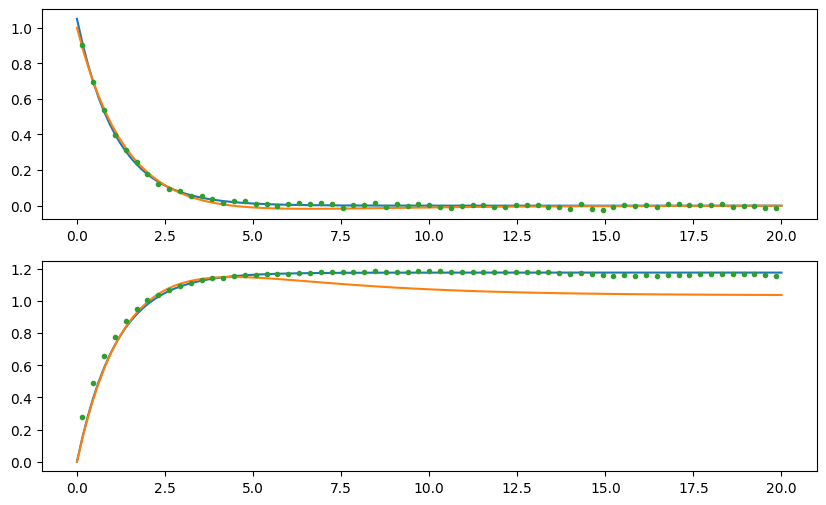

In [ ]:
# Consideremos que muestreamos la respuesta al impulso cada Ts

Ns = 2
Ts = (ti1[1]-ti1[0]) * Ns
print(f"Tiempo entre muestras {Ts}")

# Vamos a contaminar la muestra
sigma = 0.01
y1r = yi1 + sigma * np.random.randn(len(ti1))

# Muestreo cada 3 instantes
h1d = y1r[1:-1:Ns]
t1d = ti1[1:-1:Ns]

plt.figure(figsize=(10.,6))
plt.subplot(2,1,1)
plt.plot(ti1,yi1,label='Rta impulso G1(s)')
plt.plot(ti2,yi2,label='Rta impulso G2(s)')
plt.plot(t1d,h1d,'.',label='$h_k$')
plt.legend()
plt.ylabel('y(t)')
plt.grid()  

# Uso la secuencia de ponderación para calcular la respuesta al escalón
h1s = np.cumsum(h1d)*Ts
plt.subplot(2,1,2)
plt.plot(ts1,ys1,label='Rta impulso G1(s)')
plt.plot(ts2,ys2,label='Rta impulso G2(s)')
plt.plot(t1d,h1s,'.',label='$h1_k$')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('y(t)')
plt.grid()
plt.show()
